NLP or Language AI focuses in developing technologies capable of understanding (since text is unstructured), processing and generating human language.

# Bag of Words (BOW)
The first Language AI method. It is method to **represent** unstructured text. The steps are,
1. Tokenize the data (split into words/sub words)
2. Create vocabulary
3. count the number of occurences of each word in a sentence. Gives the representation of the sentence.

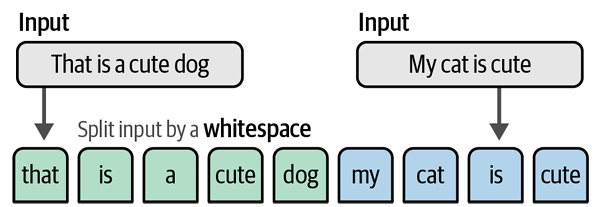

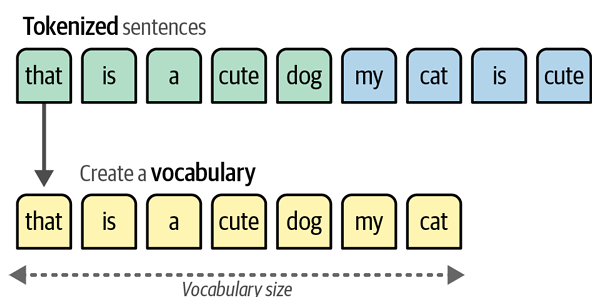

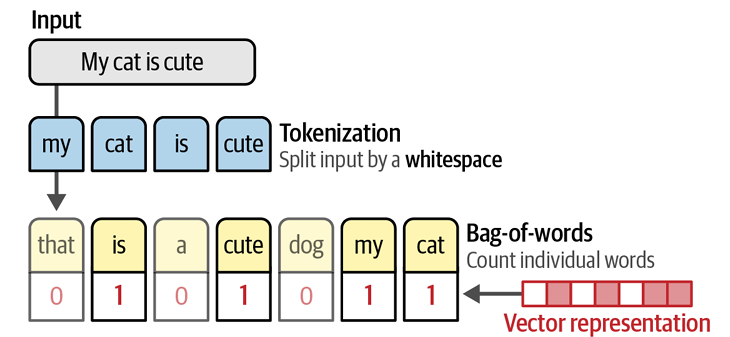

# Embedding
The downside of BOW is that it considers language as a bag of words and ignores its semantics/meaning. Embeddings are vector representation of words that capture its meaning. 

Types of embedding: word level, sentence level, document level etc. eg: BOW is a type of document level embedding but doesnt present the meaning. word2vec is a word level embedding.

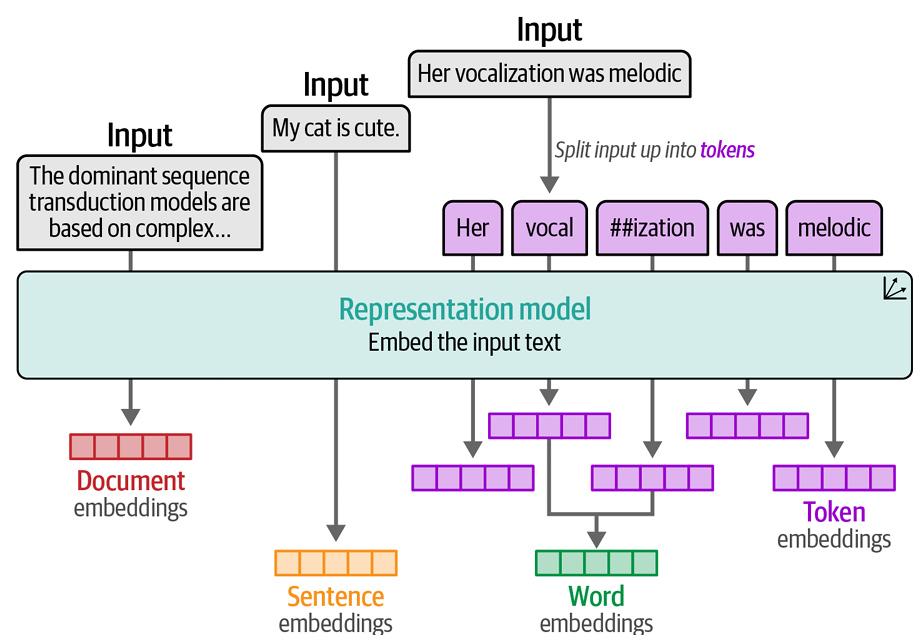

## word2vec 
It attempted to capture the meaning of text in embeddings. For this, it leveraged NN. It creates embedding which attempts to give more scores to words that occur nearby.

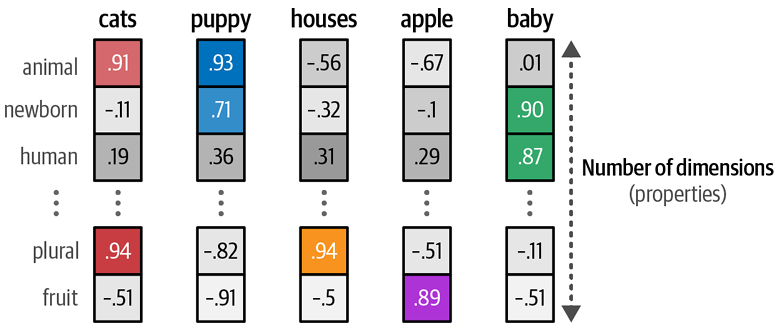

Therefore words with similary embedding will have similar meaning.

## RNN encoding decoding
word2vec will have static representation of a word, that is will have same meaning for all contexts. But in practise the embedding should vary depeding upon the context. Therefore, use RNN encoder to embed a context of a sentence.

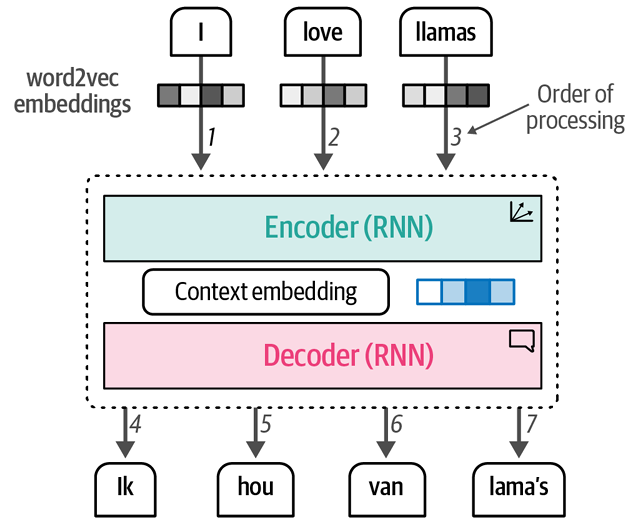

## RNN with Attention embedding
RNN encoding due to vanishing gradient and due to single vector representation cannot be used for longer sentences. Therefore attention is used to focus on required parts of the input sentence.

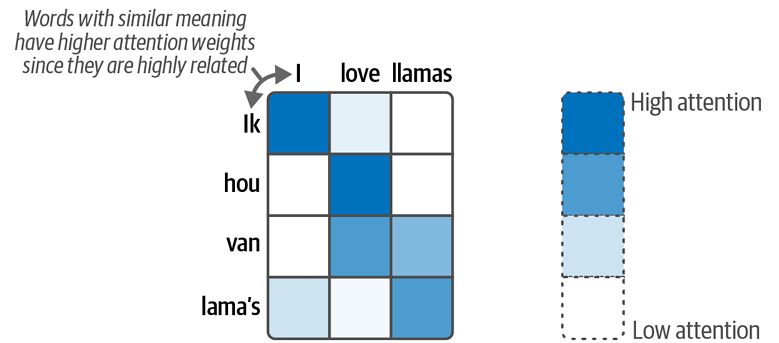

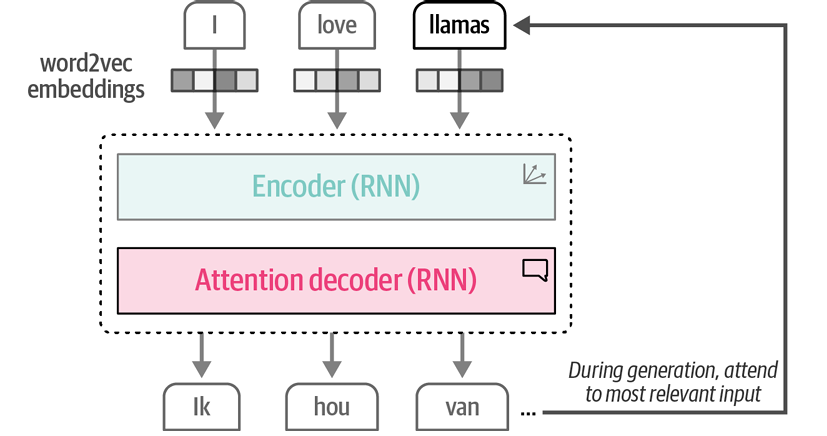

Therefore, compared to word2vec, this architecture allows for representing sequential nature of text and context in which it appear by attending each word differently.

## Attention is all you need
Used since RNN cannot be parallelised

## Encoder only models
Removes the decoder entirely so that the output is the word representation according to their sequence and context.

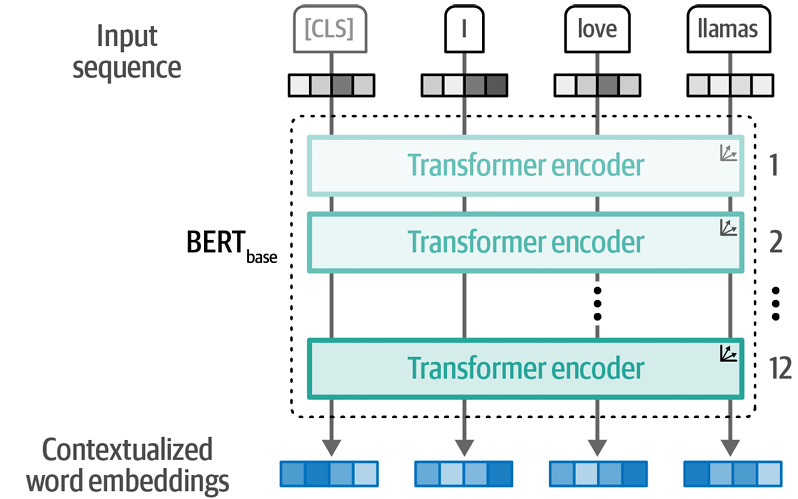

BERT is an example of representaion model. This representation can be used later on for other tasks like text classification, NER etc.

Therefore,
* Encoder only models - representation models
* Decoder only models - generative models

# Getting started with LLM

When using a LLM, two models are loaded,
* the generative model itself.
* The underlying tokenizer

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

In [6]:
# downloads the model's encoder and decoder
model = AutoModelForCausalLM.from_pretrained("microsoft/Phi-3-mini-4k-instruct", device_map="cuda",
                                            torch_dtype="auto", trust_remote_code=True)

Loading checkpoint shards: 100%|█████████████████████████████████████████████████████████| 2/2 [00:15<00:00,  7.89s/it]


In [5]:
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

In [7]:
# to combine both
from transformers import pipeline

generator = pipeline("text-generation",
                    model = model,
                    tokenizer = tokenizer,
                    return_full_text=False, # prompt wont be returned. only the ouput of the model will be returned
                    max_new_tokens= 500,    # number of tokens to generate
                    do_sample=False)        # model will generate the most probable token from output

Device set to use cuda


In [8]:
# prompt - user/query
prompt = [{"role": "user",
          "content": "Tell me about arsenal football club."}]

In [10]:
# generated output
output = generator(prompt)

In [20]:
output[0]["generated_text"]

" Arsenal Football Club, commonly referred to as Arsenal or the Gunners, is a professional football club based in Islington, London, England. Founded on December 16, 1886, as Dial Square Football Club by munitions workers at the Royal Arsenal in Woolwich, the club was originally named after the Royal Arsenal. The club moved to their current home at Highbury in 1913 and changed their name to Arsenal FC in 1914.\n\nArsenal is one of the most successful clubs in English football history, having won a record 13 League titles, 14 FA Cups, 11 League Cups, and 4 FA Community Shields. The club has also won the UEFA Champions League twice, in 1998 and 2000, and the UEFA Europa League once, in 2020.\n\nThe club's home ground is the Emirates Stadium, which opened in 2006 and has a capacity of 60,704. The stadium was built to replace the old Highbury Stadium, which had been home to Arsenal since 1913. The Emirates Stadium is known for its modern facilities, including a retractable roof, which allo